# Лабораторная работа №5. Классификация при помощи сверточных нейронных сетей.


## Цель работы
Изучить принципы работы сверточных нейронных сетей (CNN), реализовать модель для классификации изображений и провести эксперименты на данных.

## Задачи
1. Ознакомиться с основными принципами работы сверточных нейронных сетей.
2. Выбрать датасет по варианту.
3. Подготовить датасет, включая предобработку данных (нормализация,
аугментация).
4. Разработать архитектуру CNN для решения задачи классификации.
5. Обучить модель CNN на выбранном датасете, настроив гиперпараметры(количество слоев, количество фильтров, функции активации, размер батча, количество эпох и т. д.).
6. Оценить качество модели на тестовых данных, вычислив метрики: точность, полноту, F1-score, матрицу ошибок
7. Визуализировать результаты, включая графики обучения (loss, accuracy) и примеры предсказаний.

## Индивидуальное задание
Номер варианта - 2.

Датасет: "Flowers Dataset" (классификация цветов).




## Ход выполнения работы

Производился импорт необходимых библиотек.

In [ ]:
# Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Импорт библиотек
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Для матрицы ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаются данные, затем производится аугментация (заполнение дополнительными данными), в качестве размера, было принято решение взять изображение 64 на 64 пикселя для ускорения работы

In [ ]:
# Пути и параметры
train_dir = '/content/drive/MyDrive/Colab Notebooks/flowers/train'
img_size = (64, 64)
batch_size = 64
epochs = 20

# Генератор с аугментацией и разделением на train/val
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для матрицы ошибок
)

Found 2222 images belonging to 5 classes.
Found 554 images belonging to 5 classes.


Далее создается модель с тремя сверточными слоями, и двумя скрытыми слоями нейронов.

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Далее происходит обучение модели. Из-за малого количества данных и разнообразия изображений, не получилось достичь точности выше 65%.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 492s 15s/step - accuracy: 0.2653 - loss: 1.5609 - val_accuracy: 0.4062 - val_loss: 1.3567
Epoch 2/20
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4219 - loss: 1.3916

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 529ms/step - accuracy: 0.4219 - loss: 1.3916 - val_accuracy: 0.4160 - val_loss: 1.3255
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.4438 - loss: 1.2610 - val_accuracy: 0.5059 - val_loss: 1.2050
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.4844 - loss: 1.2305 - val_accuracy: 0.5117 - val_loss: 1.2105
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 588ms/step - accuracy: 0.5498 - loss: 1.1369 - val_accuracy: 0.5332 - val_loss: 1.1774
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5469 - loss: 1.0783 - val_accuracy: 0.5352 - val_loss: 1.1751
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 683ms/step - accuracy: 0.5507 - loss: 1.1204 - val_accuracy: 0.5332 - val_loss: 1.1341
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5625 - loss: 1.1418 - val_accuracy: 0.5488 - val_loss: 1.1330
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 765ms/step - accuracy: 0.5877 - loss: 1.0597 - val_accuracy: 0.5820 - v

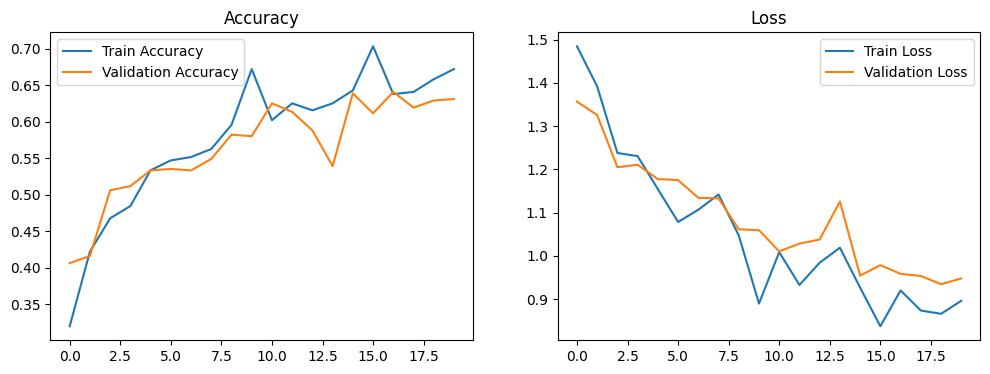

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

По графикам видно, что хоть сеть имеет низкую точность, она одинакова на валидационной и тренировочной выборках, что говорит об успешной работе системы.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step 


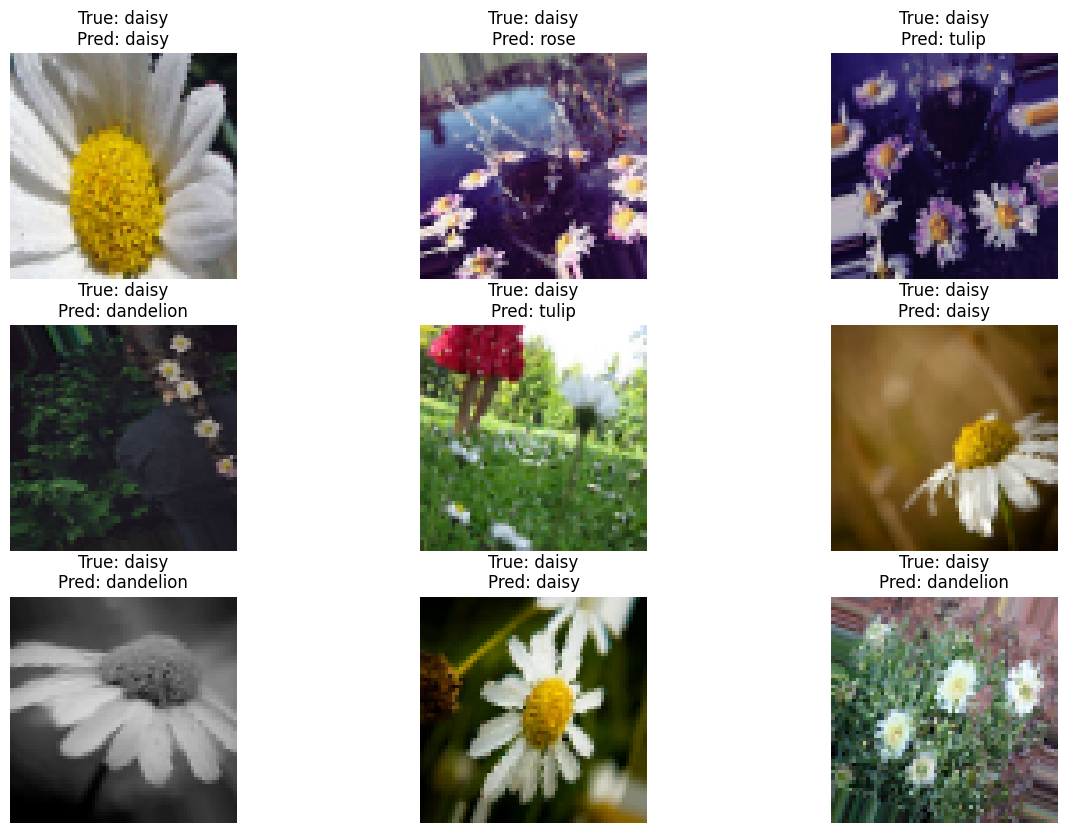

In [ ]:
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


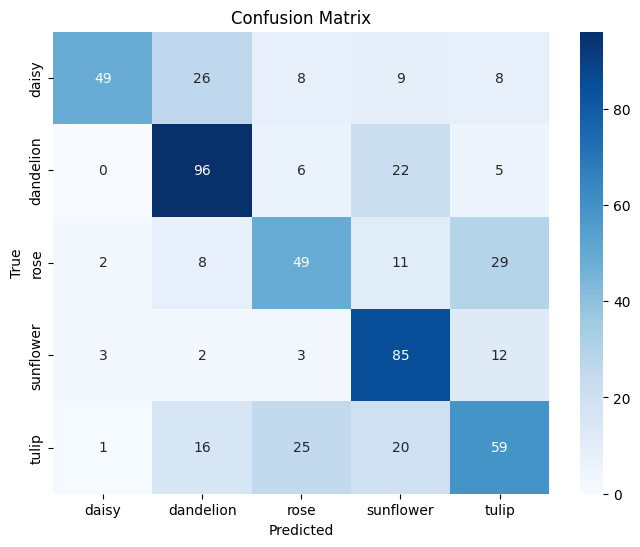

In [ ]:
validation_generator.reset()

y_true = []
y_pred = []

for i in range(len(validation_generator)):
    x_batch, y_batch = validation_generator[i]
    preds = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Матрица ошибок выглядит плохо из-за того, что одинаковые цветы могут выглядеть по-разному, например есть картинки роз разных цветов.

При анализе нейронной сети было выявлено, что она ошибается на тех картинках, где даже человеку тяжело понять, что за цветок на картинке, так, например, желтые розы в плохом качестве напоминают подсолнухи и т.д. В остальном сеть работает исправно.

## Вывод
В ходе выполнения лабораторной работы была изучена структура сверточной нейронной сети, способы ее создания и применения в улучшении качества моделей. С помощью сети были разделены данные на кластеры по погоде.